In [263]:
import numpy as np
import matplotlib.pyplot as plt

In [264]:
# Original Parameters
frequency = 1  # Hz
nyq = 2 * frequency
amplitude = 1
sampling_rate = 1000  # Hz
duration = 2  # seconds

In [265]:
sample1 = 0.5 * nyq
sample2 = nyq
sample3 = 4 * nyq

In [266]:
# Time array
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
t1 = np.linspace(0, duration, int(duration * sample1), endpoint=False)
t2 = np.linspace(0, duration, int(duration * sample2), endpoint=False)
t3 = np.linspace(0, duration, int(duration * sample3), endpoint=False)
# Continuous sinusoidal signal
continuous_signal = amplitude * np.sin(2 * np.pi * frequency * t+ np.pi/2)
continuous_signal1 = amplitude * np.sin(2 * np.pi * frequency * t1 + np.pi/2)
continuous_signal2 = amplitude * np.sin(2 * np.pi * frequency * t2 + np.pi/2)
continuous_signal3 = amplitude * np.sin(2 * np.pi * frequency * t3 + np.pi/2)


In [267]:
print(t3.size)

16


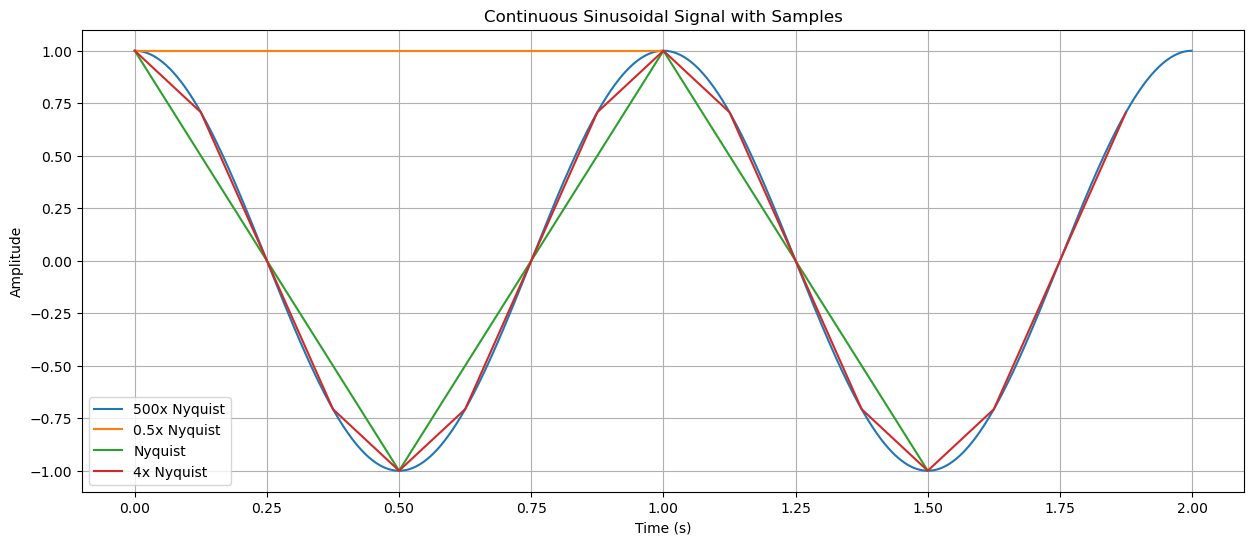

In [268]:
# Plot continuous signal with samples
#https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform
plt.figure(figsize=(15, 6))
plt.plot(t, continuous_signal, label='500x Nyquist')
plt.plot(t1, continuous_signal1, label='0.5x Nyquist')
plt.plot(t2, continuous_signal2, label='Nyquist')
plt.plot(t3, continuous_signal3, label='4x Nyquist')
#plt.scatter(t[sample_indices], sampled_values, color='red', label='Samples')
plt.title('Continuous Sinusoidal Signal with Samples')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.show()